In [2]:
!wget https://www.dropbox.com/s/webw4cr5dsnm3jv/iris1.csv


--2023-06-08 10:52:29--  https://www.dropbox.com/s/webw4cr5dsnm3jv/iris1.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/webw4cr5dsnm3jv/iris1.csv [following]
--2023-06-08 10:52:30--  https://www.dropbox.com/s/raw/webw4cr5dsnm3jv/iris1.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0489c8304f7c7529d6421c2b4b.dl.dropboxusercontent.com/cd/0/inline/B9loKjWO94lTR4mnHhwrgMeEKHe5o-X46O_LTYTkMJCirBzj5rmBTu16XBix1PyhqZxea-QpR-fzEldbCwHkXs9De7SbdwlbaFC2aaU-OEIio0QI3lue_kla88ivdnCzzKja3uFWc3E6hGWC85DD7ADeu2wylFwSFN2oGbcXKRpfyA/file# [following]
--2023-06-08 10:52:30--  https://uc0489c8304f7c7529d6421c2b4b.dl.dropboxusercontent.com/cd/0/inline/B9loKjWO94lTR4mnHhwrgMeEKHe5o-X46O_LTYTkMJCirBzj5rmBTu16XBix1PyhqZxea-QpR-fzEldbCwHkXs9De

In [3]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/iris1.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,Iris-Setosa
1,4.9,3.0,1.4,0.2,Iris-Setosa
2,4.7,3.2,1.3,0.2,Iris-Setosa
3,4.6,3.1,1.5,0.2,Iris-Setosa
4,5.0,NaN,1.4,0.2,Iris-Setosa


In [4]:
df.shape


(150, 5)

In [5]:
df.isnull().sum()

sepal length (cm)     0
sepal width (cm)     30
petal length (cm)    68
petal width (cm)      0
Class                 0
dtype: int64

If the coloumn has 40% null value drop it

In [6]:
for column in list(df.columns):
  if df[column].isnull().sum()>(0.40*150):
    df.drop(columns=column, axis=1,inplace=True)
  elif df[column].isnull().sum():
    df[column].replace(np.nan,df[column].mean(),inplace=True)
  else:
   continue


In [7]:
df

,sepal length (cm),sepal width (cm),petal width (cm),Class
0,5.1,3.5000,0.2,Iris-Setosa
1,4.9,3.0000,0.2,Iris-Setosa
2,4.7,3.2000,0.2,Iris-Setosa
3,4.6,3.1000,0.2,Iris-Setosa
4,5.0,3.0575,0.2,Iris-Setosa
...,...,...,...,...
145,6.7,3.0000,2.3,Iris-Virginica
146,6.3,2.5000,1.9,Iris-Virginica
147,6.5,3.0000,2.0,Iris-Virginica
148,6.2,3.0575,2.3,Iris-Virginica


Apply label encoder

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Class']=le.fit_transform(df['Class'])
print(df.head())
print(df['Class'].unique())


   sepal length (cm)  sepal width (cm)  petal width (cm)  Class
0                5.1            3.5000               0.2      0
1                4.9            3.0000               0.2      0
2                4.7            3.2000               0.2      0
3                4.6            3.1000               0.2      0
4                5.0            3.0575               0.2      0
[0 1 2]


outlier detection

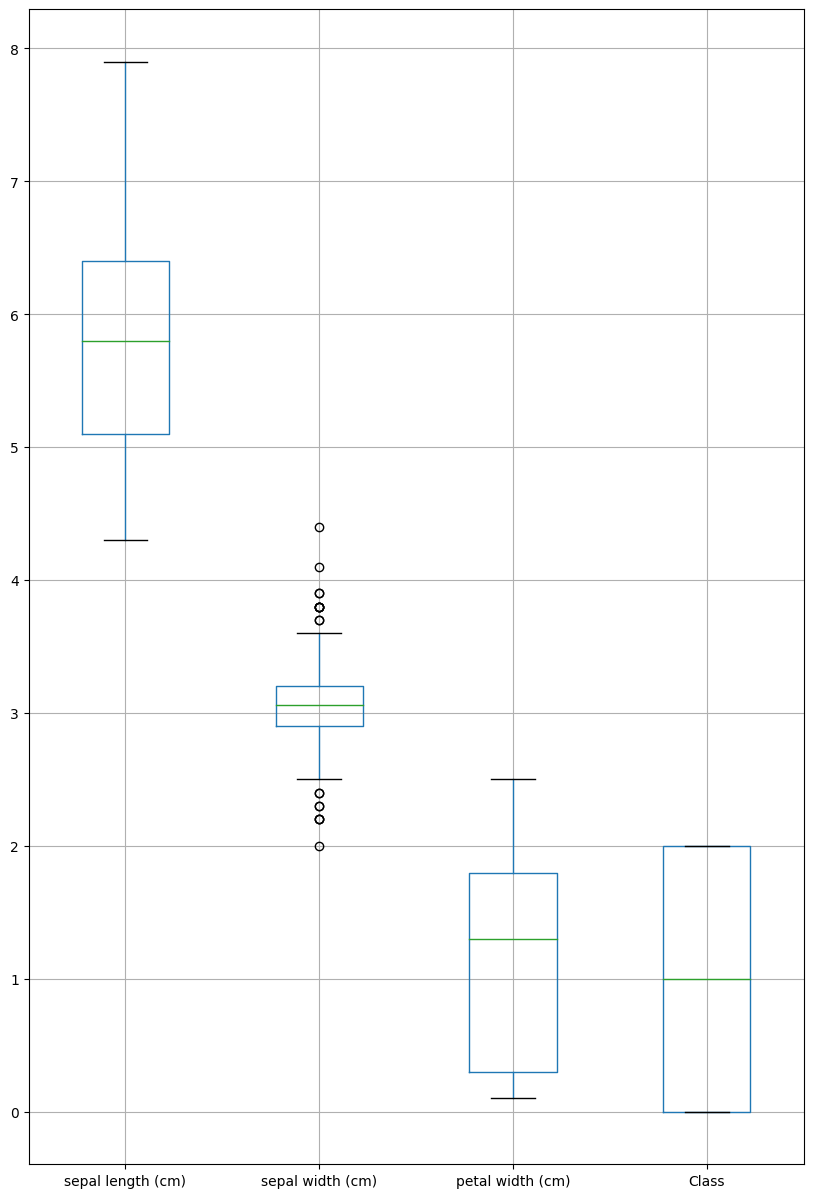

In [9]:
import matplotlib.pyplot as plt
df.boxplot(figsize=(10,15))
plt.show()

In [10]:
q1 = df['sepal width (cm)'].quantile(.25)
q3 = df['sepal width (cm)'].quantile(.75)
IQR = q3 - q1
df['sepal width (cm)'] = np.clip(df['sepal width (cm)'], q1 - 1.5 * IQR, q3 + 1.5 * IQR)

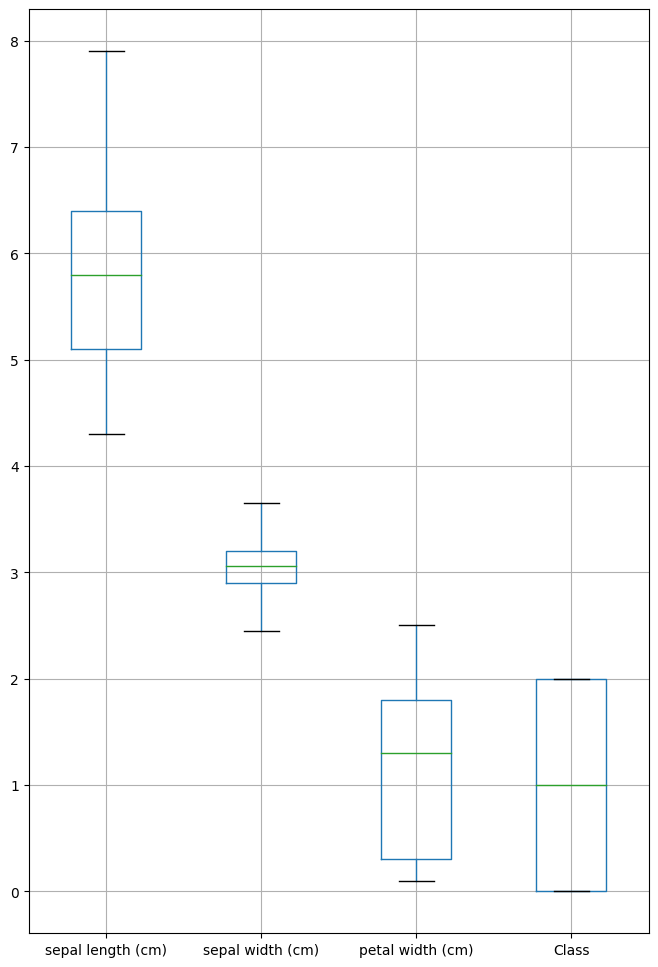

In [11]:
 df.boxplot(figsize=(8,12))
plt.show()


<Axes: >

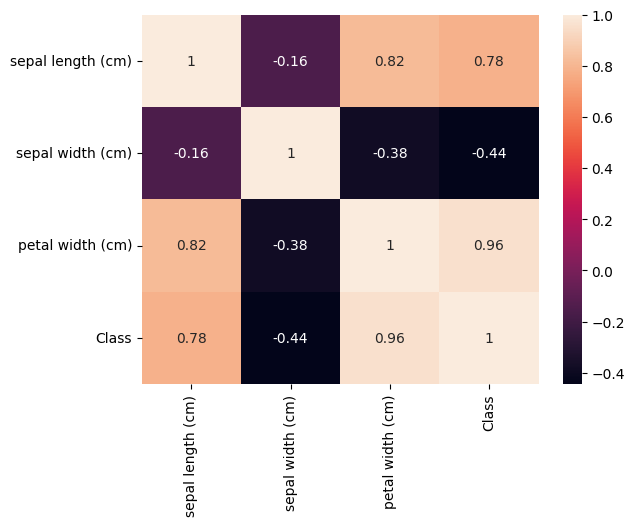

In [12]:
import seaborn as sns
correlation = df.corr()
sns.heatmap(correlation, annot = True)

Petal and sepal width are highly correlated with feature Class

In [20]:
from sklearn.model_selection import train_test_split
X= df.iloc[:,:-1]
y= df.iloc[:,-1]


In [21]:
X

,sepal length (cm),sepal width (cm),petal width (cm)
0,5.1,3.5000,0.2
1,4.9,3.0000,0.2
2,4.7,3.2000,0.2
3,4.6,3.1000,0.2
4,5.0,3.0575,0.2
...,...,...,...
145,6.7,3.0000,2.3
146,6.3,2.5000,1.9
147,6.5,3.0000,2.0
148,6.2,3.0575,2.3


In [22]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Class, Length: 150, dtype: int64

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.20,random_state = 7)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 3)
(30, 3)
(120,)
(30,)


In [30]:
import warnings
warnings.filterwarnings("ignore")

In [31]:
from sklearn.model_selection import cross_val_score,KFold
#machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
models=[]
models.append(('lr',LogisticRegression()))
models.append(('decision tree',DecisionTreeClassifier()))
models.append(('svm',SVC(gamma='auto')))
models.append(('knn',KNeighborsClassifier()))
models.append(('naive bayes',GaussianNB()))
models.append(('Random Forest',RandomForestClassifier()))
for name,model in models:
  kfold=KFold(n_splits=10)
  cross_val_sc=cross_val_score(model,X,y,scoring='accuracy',cv=kfold)
  print('{} : acc: {}(standard deviation: {})'.format(name,cross_val_sc.mean(),cross_val_sc.std()))


lr : acc: 0.9200000000000002(standard deviation: 0.07774602526460399)
decision tree : acc: 0.9333333333333333(standard deviation: 0.07888106377466154)
svm : acc: 0.9333333333333333(standard deviation: 0.07302967433402213)
knn : acc: 0.9333333333333333(standard deviation: 0.06666666666666665)
naive bayes : acc: 0.9400000000000001(standard deviation: 0.06289320754704401)
Random Forest : acc: 0.9333333333333333(standard deviation: 0.08432740427115676)
